HW1

Jialin Shi

UID 7948542502

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  # split data for training and testing
from sklearn.preprocessing import StandardScaler      # standardScaler,uniformed
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix          # test models
from sklearn.metrics import f1_score                  # test models
from sklearn.metrics import accuracy_score            # test models

In [2]:
# (a) Load the Vertebral Column Data Set from
df1 = pd.read_table('column_2C.dat',sep = ' ',header=None,engine='python')

In [3]:
# rename the columns
df1.columns=['PelvicIncidence', 'PelvicTilt', 'LumbarLordosisAngle', 'SacralSlope', 'PelvicRadius','GradeOfSpondylolisthesis','Class']
df1.head()

,PelvicIncidence,PelvicTilt,LumbarLordosisAngle,SacralSlope,PelvicRadius,GradeOfSpondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


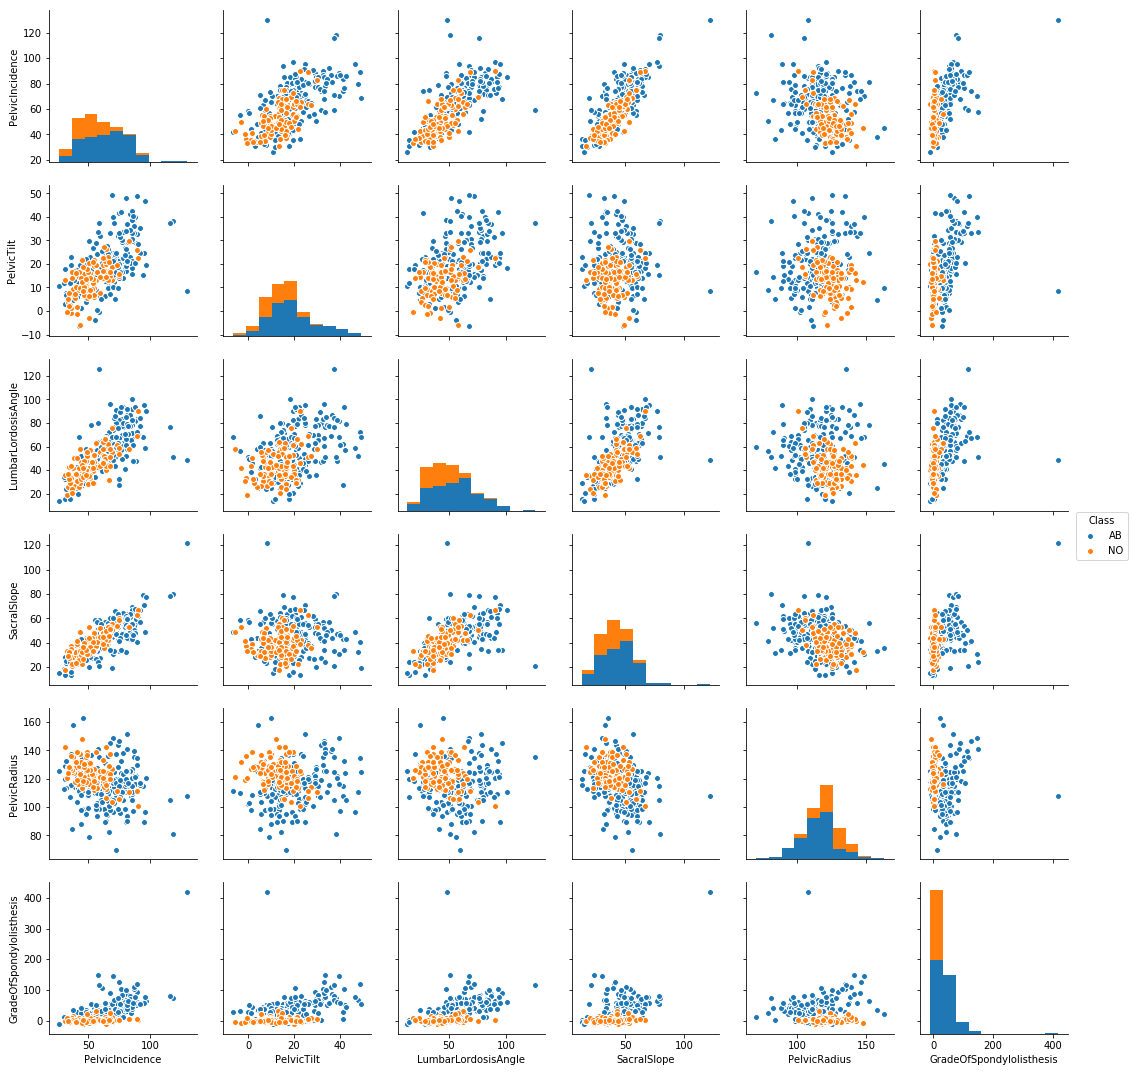

In [4]:
# (b-i)scatterplot, use color to show Classes 0 and 1
sns.pairplot(df1,hue='Class')
plt.show()

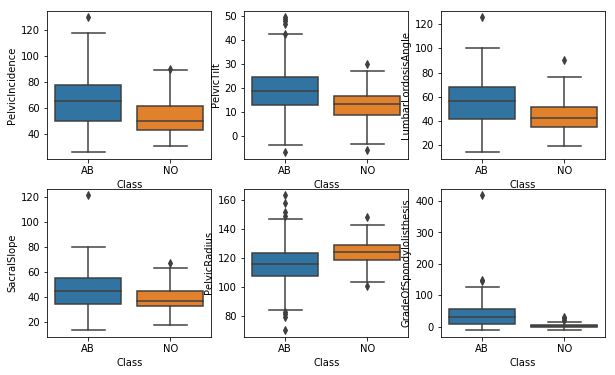

In [5]:
# (b-ii) Boxplot
plt.figure(figsize=[10,6])
for i,j in enumerate(df1.columns[0:-1]):
    plt.subplot(int(231+i))
    sns.boxplot(x='Class',y=j,data=df1)
plt.show()

In [6]:
# (b-iii) 
#Change Class label into 0,1
df1['Class'].replace('NO',0,inplace=True)
df1['Class'].replace('AB',1,inplace=True)
# split dataset
AB=df1[df1['Class']==1]
NO=df1[df1['Class']==0]
x_train= pd.concat([NO.iloc[0:70,:-1],AB.iloc[0:140,:-1]])
x_test = pd.concat([NO.iloc[70:,:-1],AB.iloc[140:,:-1]])
y_train= pd.concat([NO.iloc[0:70,-1:],AB.iloc[0:140,-1:]])
y_test = pd.concat([NO.iloc[70:,-1:],AB.iloc[140:,-1:]])

In [7]:
# (c-i) Classification using KNN on Vertebral Column Data Set
# Define the model: init K-NN
ary_k =np.arange(208,0,-3)
train_err=[]
test_err=[]
for i in ary_k:
    classifier = KNeighborsClassifier(n_neighbors= i,p=2,metric = 'euclidean')
    classifier.fit(x_train.values,y_train.values.ravel())
    train_err.append(1-classifier.score(x_train,y_train))
    test_err.append(1-classifier.score(x_test,y_test))  

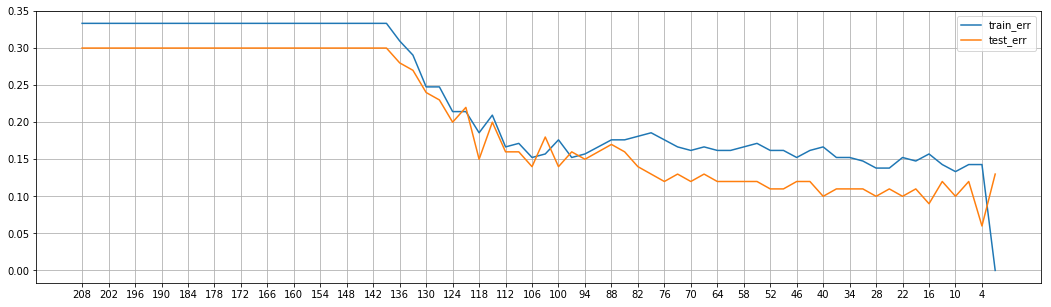

In [8]:
# (c-ii) Plot train_error and test_error
plt.figure(figsize=[18,5])
plt.plot(np.arange(1,209,3),train_err,label='train_err')
plt.plot(np.arange(1,209,3),test_err,label='test_err')
plt.xticks(np.arange(1,209,6),np.arange(1,209)[::-6])
plt.legend()
plt.grid()
plt.show()

In [9]:
# when k =4, test_err = min(test_err)
knn = KNeighborsClassifier(n_neighbors= 4,p=2,metric = 'euclidean')
knn.fit(x_train.values,y_train.values.ravel())

# predict the test result
y_pred = knn.predict(x_test)
cm =confusion_matrix(y_test,y_pred,labels=[1,0])

# tpr = tp/p, tnr = tn/n
tpr=cm[0,0]/(cm[0,0]+cm[0,1])
tnr=cm[1,1]/(cm[1,1]+cm[1,0])

# precision = tp/(classified positive)
precision= cm[0,0]/(cm[0,0]+cm[1,0])

print('Confusion Matrix is:')
print(cm)
print('F1 score is:',f1_score(y_test,y_pred))
print('True Positive Rate is:',tpr )
print('True Negative Rate is: ',tnr)
print('Precision is:',precision)
print('Test Accuracy:',accuracy_score(y_test,y_pred))

Confusion Matrix is:
[[69  1]
 [ 5 25]]
F1 score is: 0.9583333333333333
True Positive Rate is: 0.9857142857142858
True Negative Rate is:  0.8333333333333334
Precision is: 0.9324324324324325
Test Accuracy: 0.94


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      0.83      0.89        30
          1       0.93      0.99      0.96        70

avg / total       0.94      0.94      0.94       100



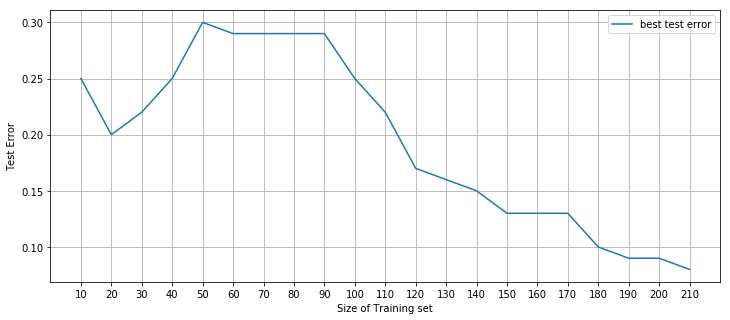

In [11]:
# (c-iii) Plot learning curve
N_set = np.arange(10,211,10)
x_test = pd.concat([NO.iloc[70:,:-1],AB.iloc[140:,:-1]])
y_test = pd.concat([NO.iloc[70:,-1:],AB.iloc[140:,-1:]])
best_k = []
test_err = []
for n in N_set:
    k_set =np.arange(1,n,5)
    x_train= pd.concat([NO.iloc[0:int(n/3),:-1],AB.iloc[0:(n-int(n/3)),:-1]])
    y_train= pd.concat([NO.iloc[0:int(n/3),-1:],AB.iloc[0:(n-int(n/3)),-1:]])
    optimal_k=1
    score =0
    for k in k_set:
        classifier = KNeighborsClassifier(n_neighbors= k,p=2,metric = 'euclidean')
        classifier.fit(x_train.values,y_train.values.ravel())
        if classifier.score(x_test,y_test)> score:
            score =classifier.score(x_test,y_test)
            optimal_k = k
            
    best_k.append(optimal_k)
    classifier = KNeighborsClassifier(n_neighbors= optimal_k,p=2,metric = 'euclidean')
    classifier.fit(x_train.values,y_train.values.ravel())
    test_err.append(1-classifier.score(x_test,y_test))

# Learning Curve- test error/ size of training set
plt.figure(figsize=[12,5])
plt.plot(N_set,test_err,label='best test error')
plt.xticks(np.arange(10,220,10))
plt.legend()
plt.grid()
plt.xlabel('Size of Training set')
plt.ylabel('Test Error')
plt.show()


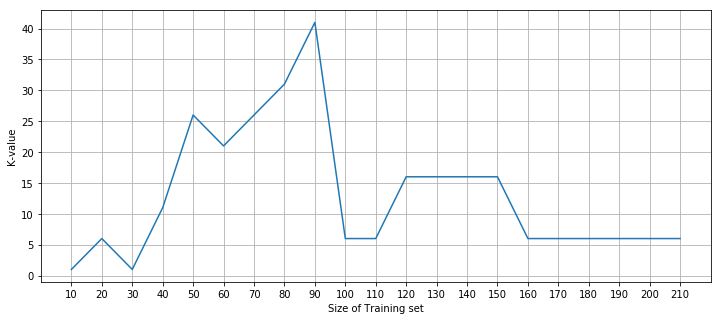

In [12]:
# best k-value for each training size
plt.figure(figsize=[12,5])
plt.plot(N_set,best_k)
plt.grid()
plt.xticks(np.arange(10,220,10))
plt.xlabel('Size of Training set')
plt.ylabel('K-value')
plt.show()
        

In [13]:
table=pd.DataFrame([],columns=['Metric','Best Test Error','Best K-value'],index=['d-i-A','d-i-B','d-i-C','d-ii'])

In [14]:
# (d-i-A)

x_train= pd.concat([NO.iloc[0:70,:-1],AB.iloc[0:140,:-1]])
x_test = pd.concat([NO.iloc[70:,:-1],AB.iloc[140:,:-1]])
y_train= pd.concat([NO.iloc[0:70,-1:],AB.iloc[0:140,-1:]])
y_test = pd.concat([NO.iloc[70:,-1:],AB.iloc[140:,-1:]])

# model
ary_k =np.arange(1,200,5)
train_err=[]
test_err=[]
for i in ary_k:
    classifier = KNeighborsClassifier(n_neighbors= i,p=1,metric = 'minkowski')
    classifier.fit(x_train.values,y_train.values.ravel())
    train_err.append(1-classifier.score(x_train,y_train))
    test_err.append(1-classifier.score(x_test,y_test))

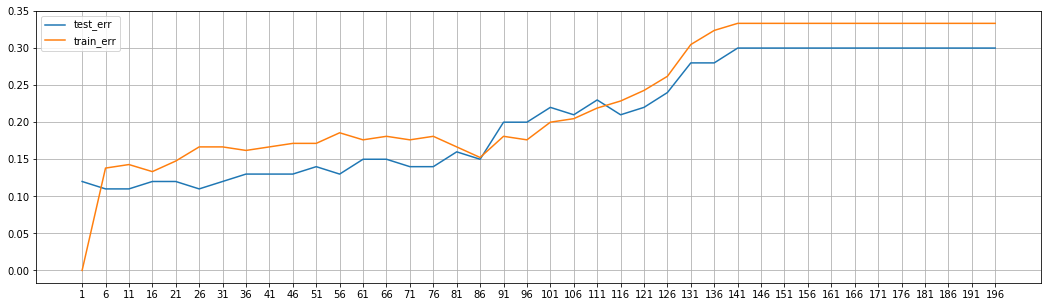

In [15]:
# find best k-value
plt.figure(figsize=[18,5])
plt.plot(np.arange(1,200,5),test_err,label='test_err')
plt.plot(np.arange(1,200,5),train_err,label='train_err')
plt.xticks(np.arange(1,200,5))
plt.legend()
plt.grid()
plt.show()

In [16]:
print('min test_err:',min(test_err))
print('best k-value:', 6)
table.iloc[0,:]=['Manhattan Distance',min(test_err),6]

min test_err: 0.10999999999999999
best k-value: 6


In [17]:
# (d-i-B)
train_err=[]
test_err=[]
ary_a=np.arange(0.1,1.1,0.1)
ary_i=np.power(10,ary_a)
for i in ary_i:
    classifier = KNeighborsClassifier(n_neighbors= 6,p=i,metric = 'minkowski')
    classifier.fit(x_train.values,y_train.values.ravel())
    train_err.append(1-classifier.score(x_train,y_train))
    test_err.append(1-classifier.score(x_test,y_test))

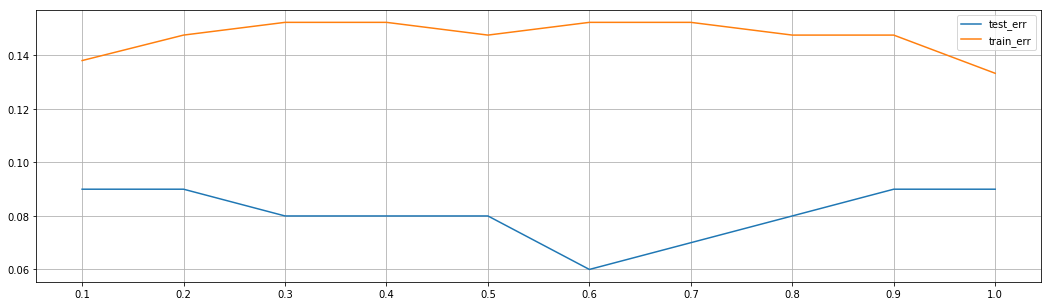

In [18]:
# find best log10(p)-value
plt.figure(figsize=[18,5])
plt.plot(ary_a,test_err,label='test_err')
plt.plot(ary_a,train_err,label='train_err')
plt.xticks(ary_a)
plt.legend()
plt.grid()
plt.show()

In [19]:
print('min test_err:', min(test_err))
print('best log10(p):',0.6)
table.iloc[1,:]=['Manhattan Distance',min(test_err),'log10(p)=0.6']
table

min test_err: 0.06000000000000005
best log10(p): 0.6


,Metric,Best Test Error,Best K-value
d-i-A,Manhattan Distance,0.11,6
d-i-B,Manhattan Distance,0.06,log10(p)=0.6
d-i-C,NaN,NaN,NaN
d-ii,NaN,NaN,NaN


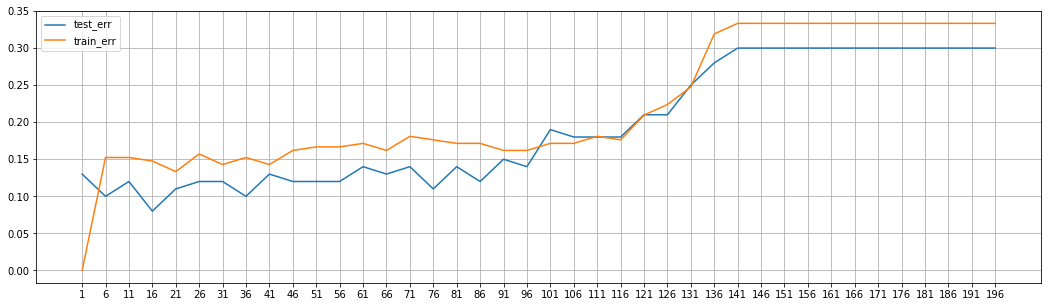

In [20]:
# (d-i-C)
train_err=[]
test_err=[]
k_set=np.arange(1,200,5)
for i in k_set:
    classifier = KNeighborsClassifier(n_neighbors=i,metric = 'chebyshev')
    classifier.fit(x_train.values,y_train.values.ravel())
    train_err.append(1-classifier.score(x_train,y_train))
    test_err.append(1-classifier.score(x_test,y_test))
plt.figure(figsize=[18,5])
plt.plot(k_set,test_err,label='test_err')
plt.plot(k_set,train_err,label='train_err')
plt.xticks(k_set)
plt.legend()
plt.grid()
plt.show()

In [21]:
print('when k is:', 16)
print('min test_err is:', min(test_err))
table.iloc[2,:]=['Chebyshev',min(test_err),'16']
table

when k is: 16
min test_err is: 0.07999999999999996


,Metric,Best Test Error,Best K-value
d-i-A,Manhattan Distance,0.11,6
d-i-B,Manhattan Distance,0.06,log10(p)=0.6
d-i-C,Chebyshev,0.08,16
d-ii,NaN,NaN,NaN


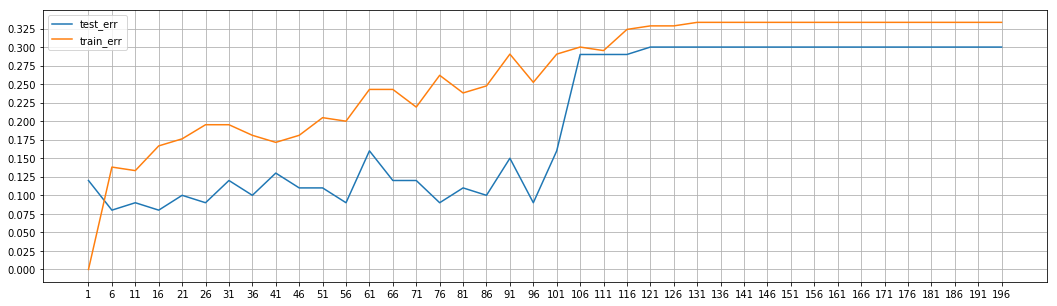

In [22]:
# (d-ii)
train_err=[]
test_err=[]
for i in k_set:
    classifier = KNeighborsClassifier(n_neighbors=i,metric_params={'V':np.linalg.pinv(x_train.cov())},metric = 'mahalanobis')
    classifier.fit(x_train.values,y_train.values.ravel())
    train_err.append(1-classifier.score(x_train,y_train))
    test_err.append(1-classifier.score(x_test,y_test))
plt.figure(figsize=[18,5])
plt.plot(k_set,test_err,label='test_err')
plt.plot(k_set,train_err,label='train_err')
plt.xticks(k_set)
plt.yticks(np.arange(0,0.35,0.025))
plt.legend()
plt.grid()
plt.show()

In [23]:
print('k = 6')
print('min test_err', min(test_err))
table.iloc[3,:]=['mahalanobis',min(test_err),'6']
table

k = 6
min test_err 0.07999999999999996


,Metric,Best Test Error,Best K-value
d-i-A,Manhattan Distance,0.11,6
d-i-B,Manhattan Distance,0.06,log10(p)=0.6
d-i-C,Chebyshev,0.08,16
d-ii,mahalanobis,0.08,6


In [24]:
# (e)
list_metric=['euclidean','minkowski','chebyshev']
list_p = [2,1,None]
list_p[0]

2

In [25]:
a=-1
for i in list_metric:
    train_err=[]
    test_err=[]
    for k in k_set:
        classifier = KNeighborsClassifier(n_neighbors=k,metric = i,p=list_p[a+1],weights='distance')
        classifier.fit(x_train.values,y_train.values.ravel())
        train_err.append(1-classifier.score(x_train,y_train))
        test_err.append(1-classifier.score(x_test,y_test))
    a=a+1
    print(i,min(test_err))

euclidean 0.09999999999999998
minkowski 0.09999999999999998
chebyshev 0.10999999999999999


# (f)
The lowest training error rate I got in this homework  is 0 when k=1.
You can see the answer in the plot (c-ii).